In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')


In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:, 3:5].values

In [9]:
from sklearn.metrics.pairwise import rbf_kernel 
#we can't pass raw data like k_mean and other centroid based algorithms because
#spectral clusteting works with similarity(connections) not for co-ordinates 
adjacency_matrix = rbf_kernel(X, gamma=0.1) 

In [29]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=3, affinity='precomputed_nearest_neighbors', n_init=100,
                        assign_labels='discretize')
y_sc=sc.fit_predict(adjacency_matrix) 

In [30]:
y_sc

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [31]:
supervised=dataset

In [32]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [33]:
supervised['Cluster_group']=y_sc

In [34]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


In [42]:
supervised['Cluster_group'].value_counts()

Cluster_group
0    98
2    54
1    48
Name: count, dtype: int64

In [43]:
supervised.to_csv("cluster.csv",index=False)

In [44]:
supervised.columns[3]

'Annual Income (k$)'

In [45]:
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

C:\Anaconda3.12.v\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


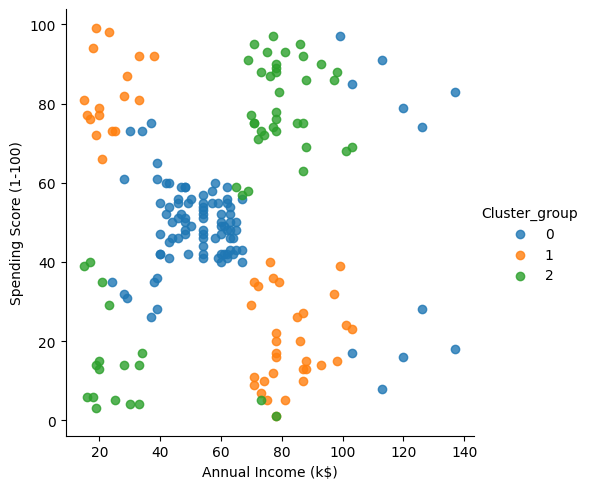

In [46]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)